In [1]:
# Import needed modules
import math #used for the different mathematic functions as exponentials and logarithm
from scipy import stats #used to compute the regression equation
# numpy will be used to convert lists to arrays and to use log, exp and fitting functions
import numpy as np 
# matplotlib will be used for plotting
import matplotlib.pyplot as plt

#### After the researcher did the fitting, she obtained the following values:
    qsat = 4.72 mmol/g
    k(263) = 6.75e-06 1/Pa
    k(303) = 1.48e-06 1/Pa
    k(343) = 5.16e-07 1/Pa

#### Use the Van't Hoff equation to obtain k0 and deltaH

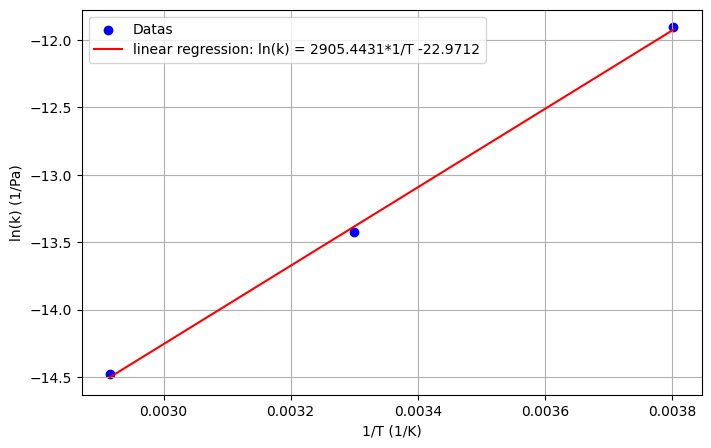

The adsorption enthalpy is -24.16 kJ/mol, and the standard equilibrium constant is k0 = 1.06e-10 1/Pa


In [2]:
###################################### Group the temperatures and K values in arrays
T = np.array([263, 303, 343])
k = np.array([6.75e-06, 1.48e-06, 5.16e-07])

###################################### We know that we need to plot lnk vs. 1/T
ln_k = np.array([math.log(i) for i in k])
T_inv = np.array([float(1/i) for i in T])

###################################### Plot of lnk vs. 1/T
# fitting
slope, intercept, r_value, p_value, std_err = stats.linregress(T_inv, ln_k)

# plot
plt.figure(figsize=(8, 5))
plt.scatter(T_inv, ln_k, label='Datas', color='blue')  
plt.plot(T_inv, slope*T_inv + intercept, label=f'linear regression: ln(k) = {slope:.4f}*1/T {intercept:.4f}', color='red')  # Fit

# labels and legend
plt.xlabel('1/T (1/K)')
plt.ylabel('ln(k) (1/Pa)')
plt.legend()
plt.grid(True)

plt.show()

###################################### Solve for the unknowns by linear fitting
k0 = math.exp(intercept)
R = 8.314
delta_H = round(-(slope*R)/1000,2)

###################################### Print the results
print(f"The adsorption enthalpy is {delta_H} kJ/mol, and the standard equilibrium constant is k0 = {k0:.2e} 1/Pa")

#### Calculate Henry's coefficients for the different temperatures

In [3]:
# Calculating the Henry's coefficients
qsat = 4.72
Kh = np.array([qsat*i for i in k])
#write Kh values is scientific notation
sci_Kh = ["{:.2e}".format(num) for num in Kh]

#print the results
column1 = ['Temperature(K)',263, 303, 343]
print(f"{column1[0]:<15} {'Kh (mmol/g.Pa)':<15}")

for item1, item2 in zip(column1[1:], sci_Kh):
    print(f"{item1:<15} {item2:<15}")

Temperature(K)  Kh (mmol/g.Pa) 
263             3.19e-05       
303             6.99e-06       
343             2.44e-06       


As explained in question 3 on the word document, the Henry coefficient Kh has an exponential relation with the temperature's inverse (1/T) (Equation 10, page 3). Therefore, as the temperature increases, the Henry coefficient should exponentially decrease. However, in this experiment, the Kh value calculated at 343 K is lower than the one calculated at 303 K which is in contradiction with the previous statement. This difference might be due to the multiple assumptions made in the Langmuir model used for these calculations (cited in question 1 in the word document). Indeed, in reality the adsorbant properties can be slightly different resulting in a much more complexe trend.